# Probability Zoo
### Understanding Uncertainty

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('./data/nhanes_data_17_18.csv', low_memory=False)
#df.columns.to_list()

## Support of a Random Variable
- The **support** of a random variable $X$ is the set of values which can occur:
$$
\text{supp}(X) = \{ x : f_X(x) > 0 \text{ or } m_X(x)>0 \}
$$
These are the possible values the variable can take, and one of the more important (if obvious) concerns in modeling

## Probability Zoo
- There are a dozen or so distributions that people use everyday for modeling purposes
- There are hundreds of named distributions: Even though we're looking at what might feel like a large number, there are many more in standard use
- We need these things for various kinds of modeling and estimation (Maximum likelihood, Bayesian)

## Core Questions
- What are the parameters of the distribution?
- What is the support of the distribution?
- What is the shape of the distribution on its support?
- How do the parameters tune the density and distribution?

## Your task for subsequent exercises:
0. Determine the support
1. Compute the density from the distribution (take a derivative)
2. Plot the density and distribution for a variety of parameter values
3. Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
4. Find an example of this general type of PDF/CDF from the Metabric cancer data

For parts 2/3, you can use https://docs.scipy.org/doc/scipy/reference/stats.html

## Example: Uniform
A random variable $X$ has the **Uniform Distribution on $[0,u]$** if its CDF is:
$$
F(x;u) = \begin{cases}
0, & x < 0 \\
x/u, & 0 \le x \le u \\
1, & x>u,
\end{cases}
$$
with $u>0$.

The density is 
$$
f(x;u) = \begin{cases}
0, & x < 0 \\
1/u, & 0 \le x \le u \\
0, & x>u.
\end{cases}
$$

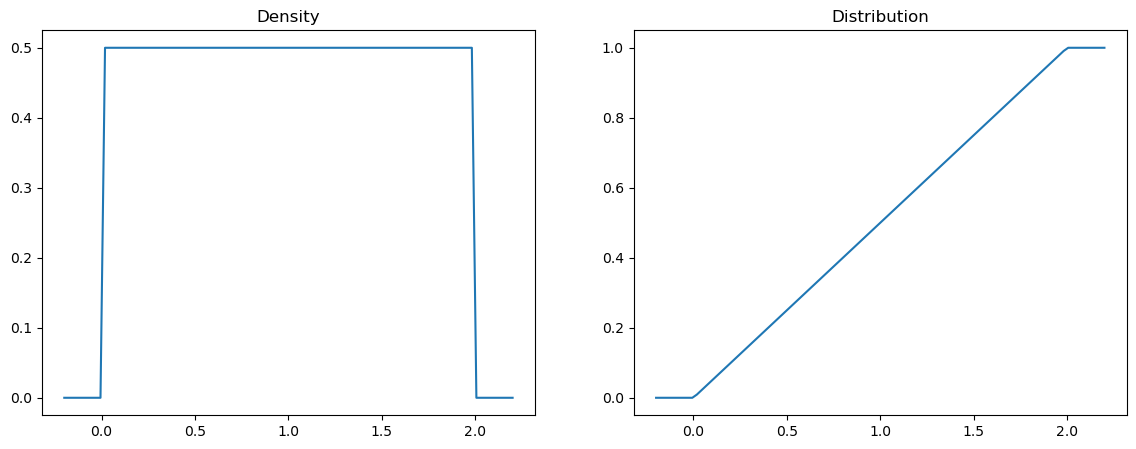

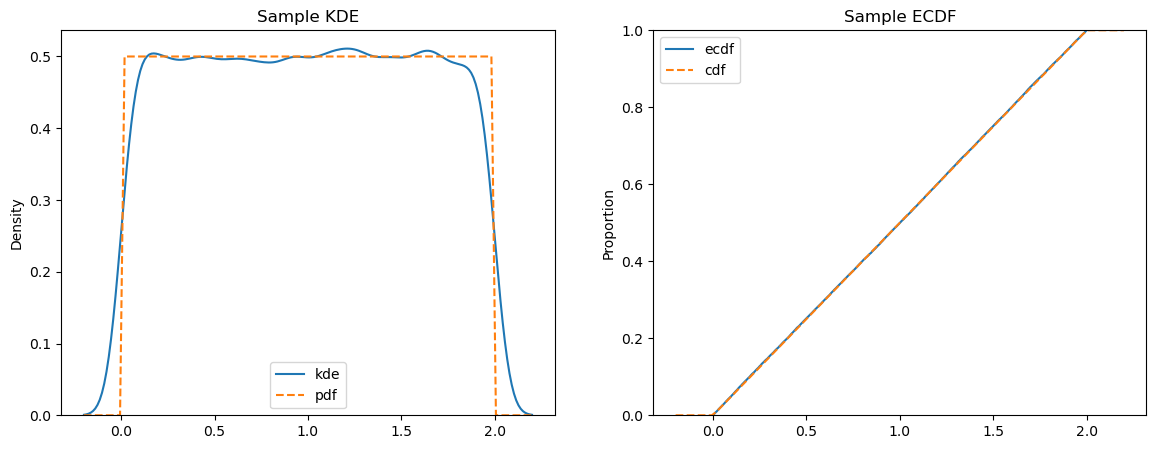

In [2]:
grid = np.linspace(-.2,2.2,100)
u = 2

## Plot the density and distribution
pdf = sp.stats.uniform.pdf(grid,scale=2)
cdf = sp.stats.uniform.cdf(grid,scale=2)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

# Sampling
sample = sp.stats.uniform.rvs(scale=u,size=50000,random_state=10)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('Sample ECDF')
plt.show()


[Text(0.5, 1.0, 'Example: Sequence number (really had to reach here...)')]

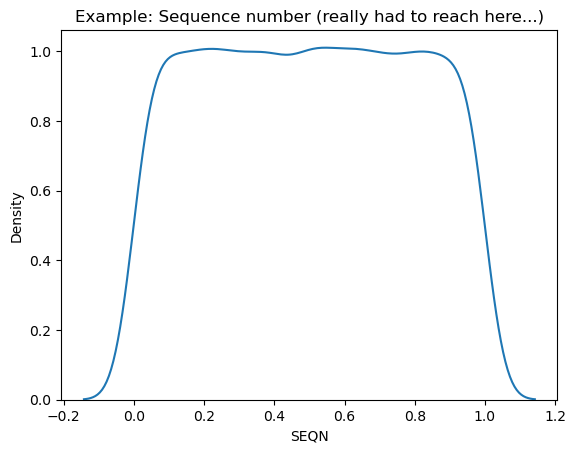

In [13]:
# Example:
x = (df['SEQN']-df['SEQN'].min())/(df['SEQN'].max()-df['SEQN'].min())
sns.kdeplot(x).set(title='Example: Sequence number (really had to reach here...)')

## Example: Beta Distribution
- A random variable $X$ is **Beta distributed** if its CDF is:
$$
F(x;a,b) = \begin{cases}
0, & x < 0 \\
\frac{1}{\int_{0}^{1} t^{a-1}(1-t)^{b-1} dt}\int_{0}^x t^{a-1}(1-t)^{b-1} dt, & 0 \le x \le 1 \\
1, & x>1,
\end{cases}
$$
with $a,b >0$


The density is
$$
f(x;a,b) = \begin{cases}
0, & x < 0 \\
\dfrac{x^{a-1}(1-x)^{b-1}}{\int_{0}^{1} t^{a-1}(1-t)^{b-1} dt}, & 0 \le x \le 1 \\
0, & x>1
\end{cases}
$$

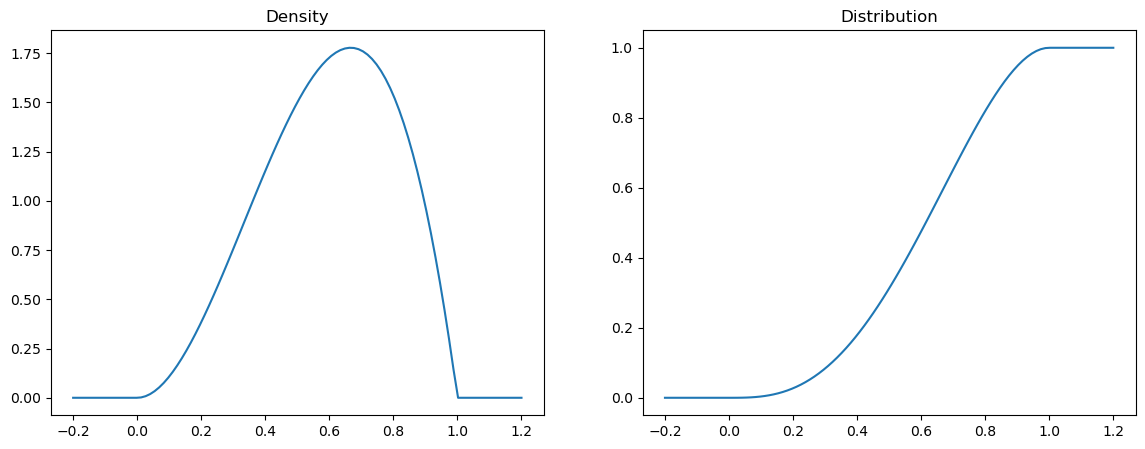

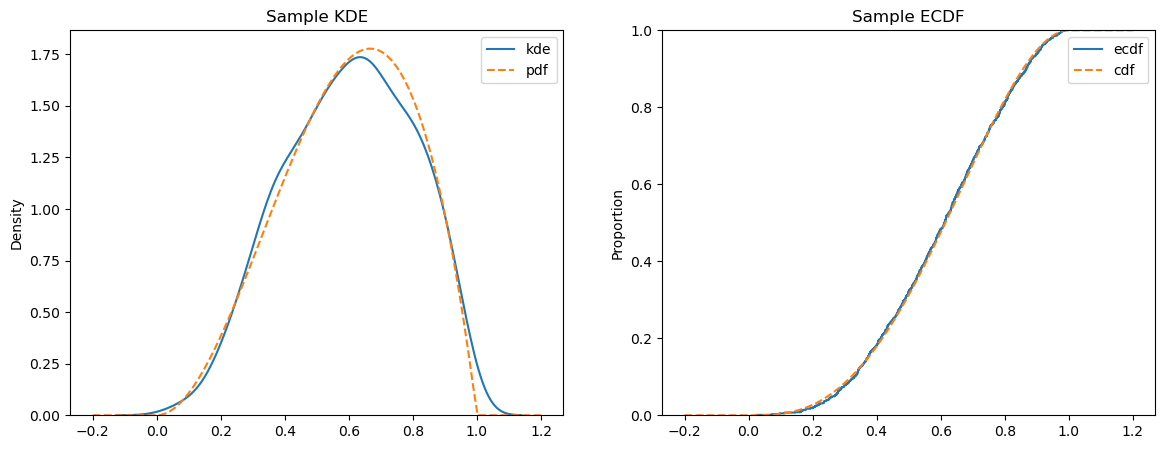

In [4]:
## Beta Parameters:
a = 3
b = 2

grid = np.linspace(-.2,1.2,100)

## Plot the density and distribution
pdf = sp.stats.beta.pdf(grid,a=a,b=b)
cdf = sp.stats.beta.cdf(grid,a=a,b=b)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

# Sampling
sample = sp.stats.beta.rvs(a=a,b=b,size=1000,random_state=10)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('Sample ECDF')
plt.show()


[Text(0.5, 1.0, 'Example: Total Percent Fat in Diet')]

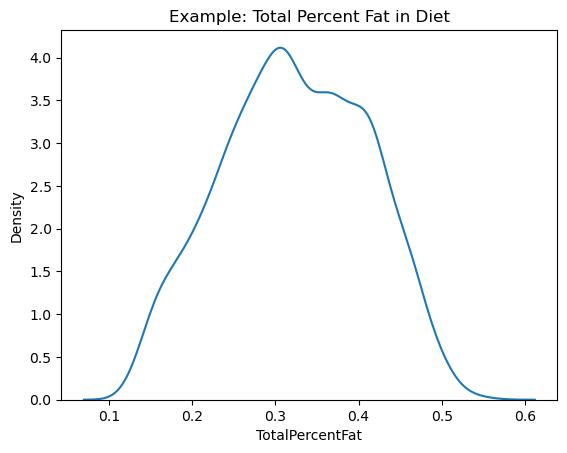

In [5]:
sns.kdeplot(df['TotalPercentFat']/100).set(title='Example: Total Percent Fat in Diet')

## Example: Normal Distribution
- A random variable $X$ has the Normal distribution if its CDF is:
$$
F(x; \mu, \sigma) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} \exp \left\lbrace - \frac{(z-\mu)^2}{2\sigma^2} \right\rbrace dz,
$$
with $\sigma>0$.
- When $\mu = 0$ and $\sigma =1$, we often write this as the **standard normal CDF**:
$$
\Phi(z) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{- z^2/2} dz,
$$
and then
$$
F(x; \mu, \sigma^2) = \Phi\left( \dfrac{x-\mu}{\sigma} \right)
$$

## Answer:
The normal PDF is
$$
f(x; \mu, \sigma) =  \frac{1}{\sqrt{2\pi }\sigma} \exp \left\lbrace - \frac{(x-\mu)^2}{2\sigma^2} \right\rbrace 
$$
When $\mu=1$ and $\sigma^2=1$, we have the **standard normal pdf**:
$$
\phi(z) =  \frac{1}{\sqrt{2\pi}} e^{-z^2/2},
$$
and then
$$
f(x; \mu, \sigma) = \frac{1}{\sigma} \phi\left(\dfrac{x-\mu}{\sigma} \right)
$$
- I use $\Phi$ and $\phi$ so much that I sometimes forget the details of the underlying equations

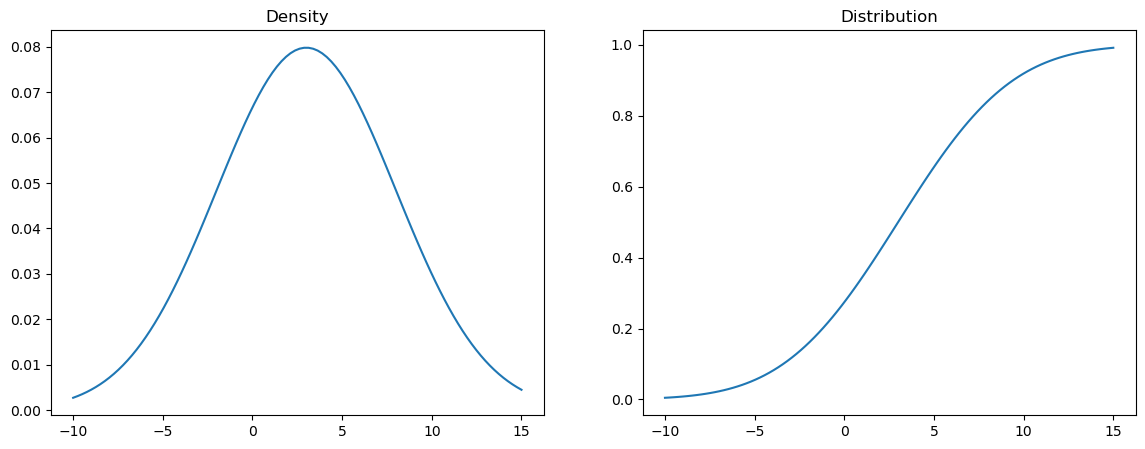

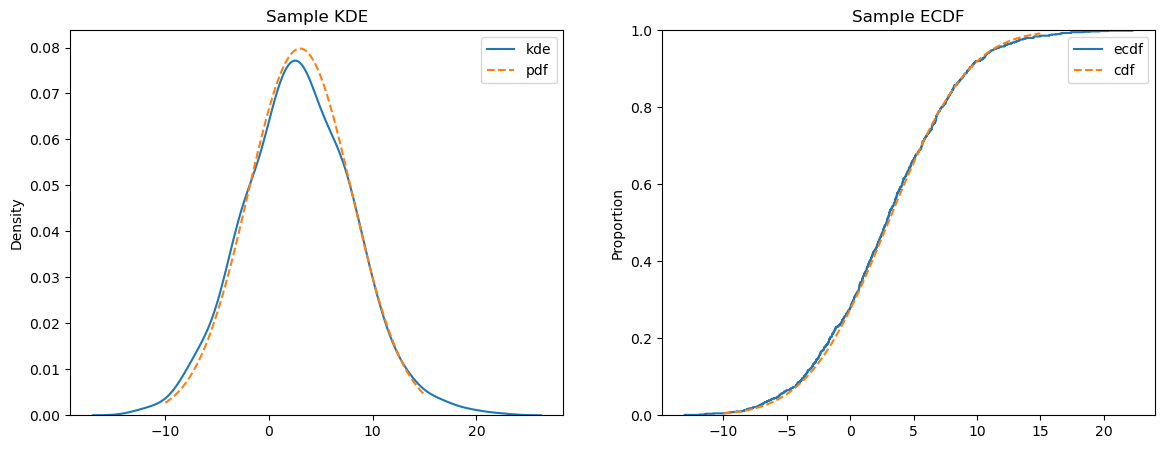

In [6]:
## Normal Parameters:
mu = 3
sig_sq = 5

grid = np.linspace(-10,15,100)


## Plot the density and distribution
pdf = sp.stats.norm.pdf(grid,loc=mu,scale=sig_sq)
cdf = sp.stats.norm.cdf(grid,loc=mu,scale=sig_sq)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

# Sampling
sample = sp.stats.norm.rvs(loc=mu,scale=sig_sq,size=1000,random_state=100)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('Sample ECDF')
plt.show()


[Text(0.5, 1.0, 'Example: Sleep Hours')]

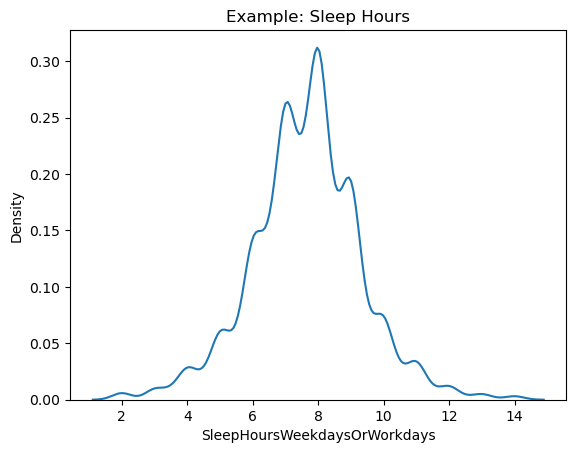

In [7]:
## Example:
sns.kdeplot(df['SleepHoursWeekdaysOrWorkdays']).set(title='Example: Sleep Hours')

[Text(0.5, 1.0, 'Example: Blood Selenium')]

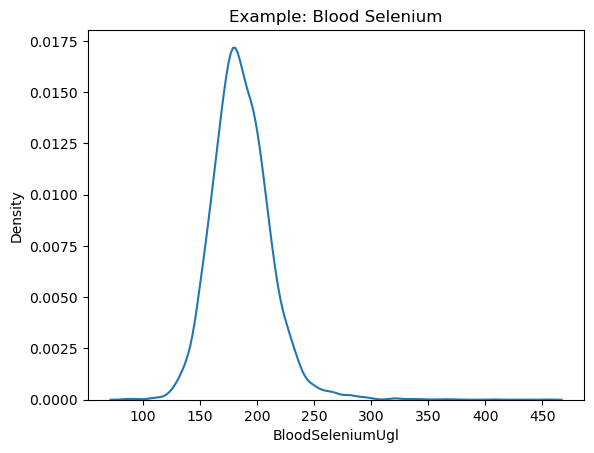

In [8]:
sns.kdeplot(df['BloodSeleniumUgl']).set(title='Example: Blood Selenium')

## Exercise: Logistic Distribution
- A random varaible has the Logistic Distribution if its CDF is:
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.

## Example: Log-Normal Distribution
- The log-normal variable is a bit of a puzzle, but very useful for modeling phenomena that must be positive and have a long tail. A variable $X$ is **log-normal** if $\ln(X)=Y$ is normally distributed. So in principle, $Y$ is a normally distributed random variable, and you compute $X = e^{Y}$ to get $X$. This means that we plug $\ln(x)$ into the Normal distribution to get the log-normal distribution:
$$
F(x; \mu, \sigma) = \begin{cases}
\Phi\left( \dfrac{\ln(x)-\mu}{\sigma} \right), & x > 0 \\
0, & x \le 0,
\end{cases}
$$
with $\sigma>0$.

### Answer: 
The density for the lognormal is
$$
f(x;\mu,\sigma) = \dfrac{1}{\sqrt{2\pi} x \sigma} \exp \left( - \dfrac{(\ln(x)-\mu)^2}{2\sigma^2} \right)= \dfrac{1}{x \sigma} \phi \left( \dfrac{\ln(x)-\mu}{\sigma} \right)
$$

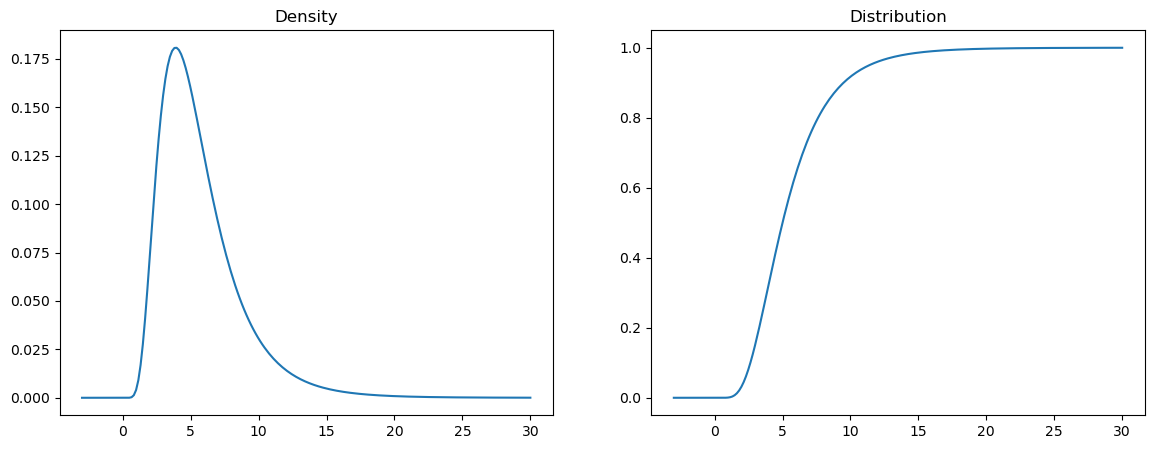

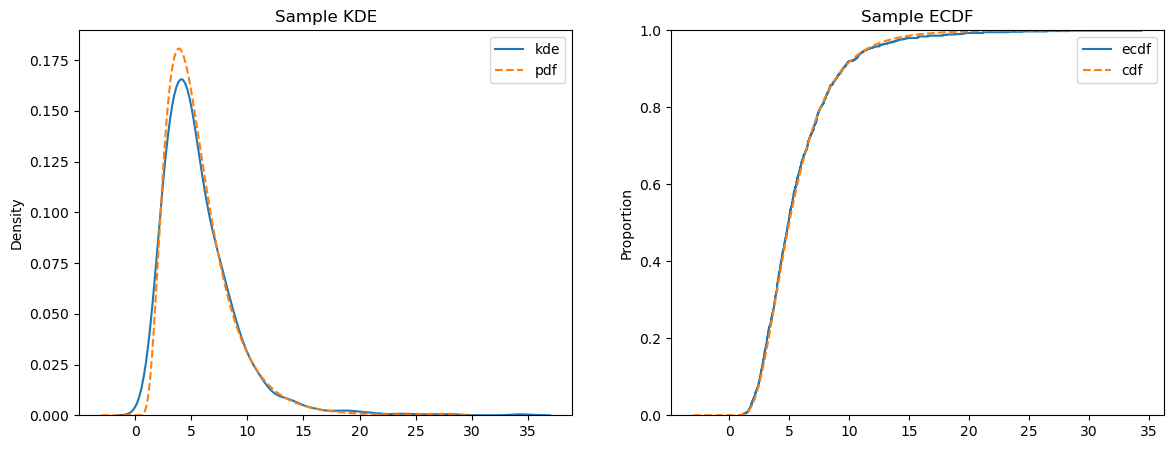

In [9]:
## Normal Parameters:
mu = 5
sig_sq = 0.5

grid = np.linspace(-3,30,200)

## Plot the density and distribution
pdf = sp.stats.lognorm.pdf(grid,scale=mu,s=sig_sq)
cdf = sp.stats.lognorm.cdf(grid,scale=mu,s=sig_sq)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()


# Sampling
sample = sp.stats.lognorm.rvs(scale=mu,s=sig_sq,size=1000,random_state=100)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('Sample ECDF')
plt.show()


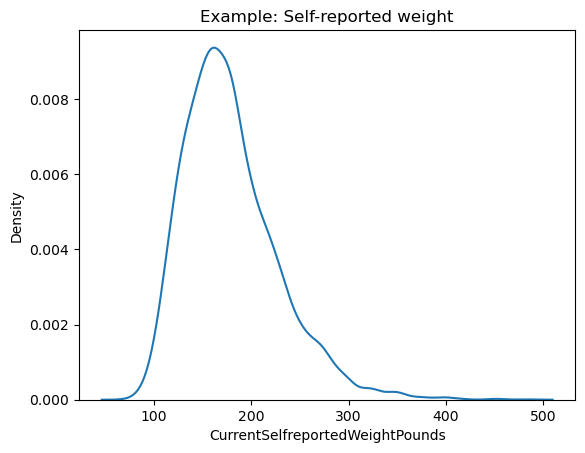

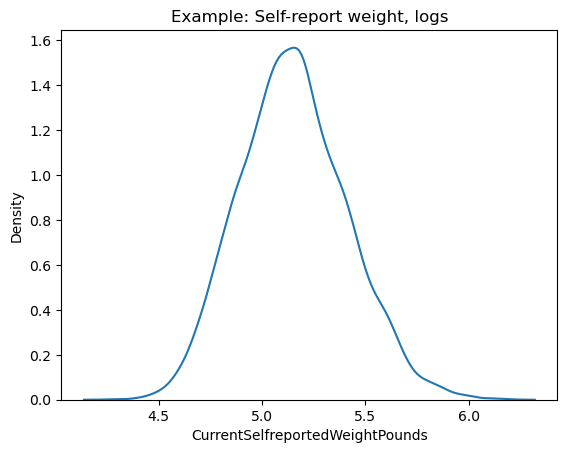

In [10]:
# Example

x = df['CurrentSelfreportedWeightPounds']
x = x[x<500]
sns.kdeplot(x).set(title='Example: Self-reported weight')
plt.show()

log_x = np.log(x)
sns.kdeplot(log_x).set(title='Example: Self-report weight, logs')
plt.show()


## Exercise: Exponential Distribution
- A random variable $X$ is **exponentially distributed** if its CDF is given by:
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.


$$

## Exercise: Pareto Distribution

- A random variable $X$ is **Pareto distributed** if its CDF is given by
$$
F_X(x;a) = \begin{cases}
0, & x<x_m \\
1 - \left( \dfrac{x}{z}\right)^a, & x \ge z,
\end{cases}
$$
with $a,z>0$.

## Example: Poisson Distribution
- The previous distributions have all had support on an interval, all of the real numbers, or only the positive real numbers
- Sometimes, we need a variable with support only on the positive integers
- A random variable $X$ has the **Poisson Distribution** if its CDF is 
$$
F(k;\lambda) = \begin{cases}
\sum_{j=0}^k \dfrac{\lambda^j e^{-\lambda}}{j!}, & \text{$k$ a positive integer}\\
0, & \text{otherwise,}
\end{cases}
$$
with $\lambda>0$.

- The probability mass function for the Poisson is
$$
f(k;\lambda) = F(k;\lambda) - F(k-1; \lambda) = \begin{cases} \dfrac{\lambda^k e^{-\lambda}}{k!}, & \text{$k$ a positive integer} \\
0, & \text{otherwise} 
\end{cases}
$$

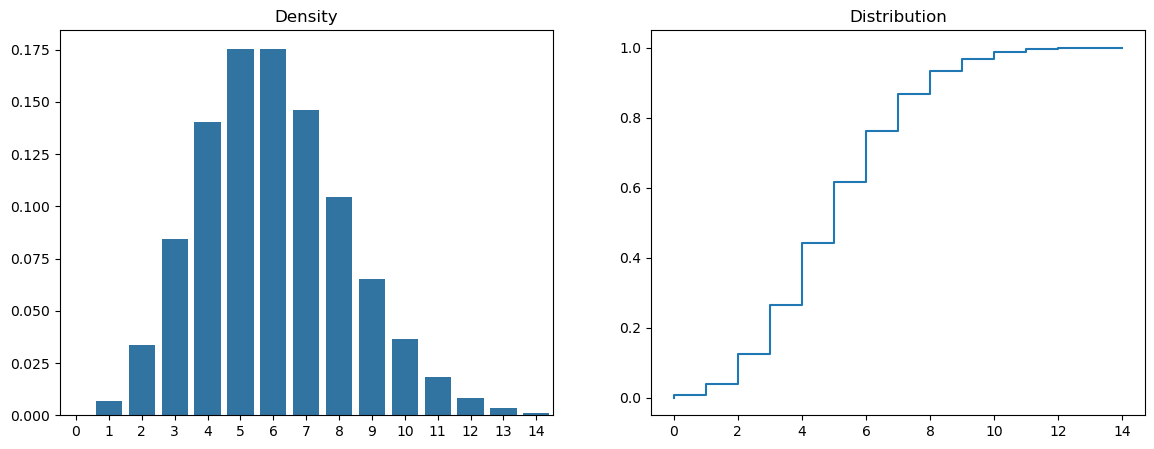

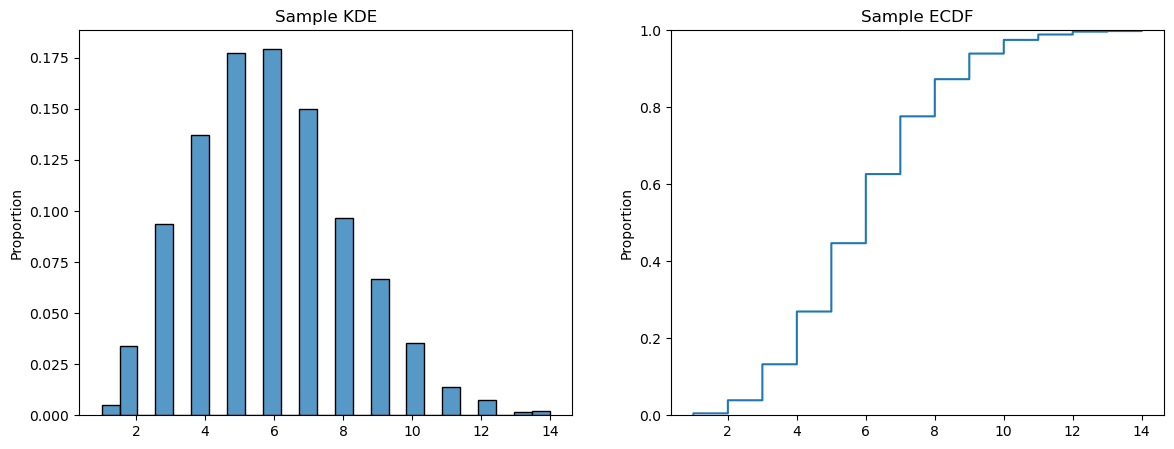

In [11]:
## Normal Parameters:
mu = 5
loc = 1

## Plot the density and distribution
grid = np.arange(0,15)

pdf = sp.stats.poisson.pmf(grid,mu=mu,loc=loc)
cdf = sp.stats.poisson.cdf(grid,mu=mu,loc=loc)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
axes[1].step(x=grid,y=cdf)
axes[1].set_title('Distribution')
plt.show()

# Sampling
sample = sp.stats.poisson.rvs(mu=mu,loc=loc,size=2000,random_state=100)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot(sample,bins=25,stat='proportion',ax=axes[0])
axes[0].set_title('Sample KDE')
#axes[1].step(x=grid,y=cdf)
sns.ecdfplot(sample,ax=axes[1])
axes[1].set_title('Sample ECDF')
plt.show()


[Text(0.5, 1.0, 'Example: Attempts to quit smoking')]

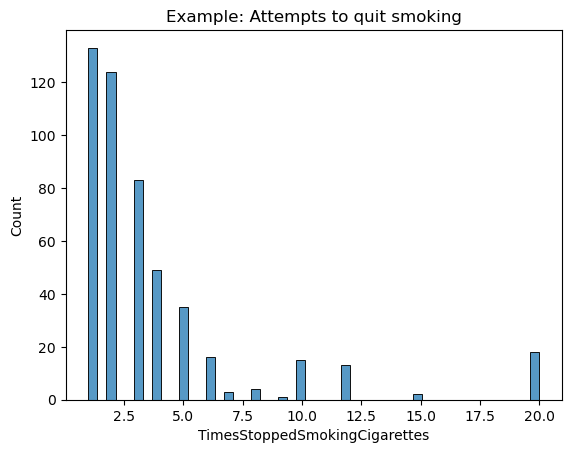

In [12]:
# Example
x = df['TimesStoppedSmokingCigarettes']
x = x[x<100]
sns.histplot(x,bins=50).set(title='Example: Attempts to quit smoking')

## Some Special Cases
- The **Cauchy distribution** is 
$$
F(x) = \dfrac{1}{2} + \dfrac{1}{\pi} \text{arctan} \left( \frac{x - x_0}{\gamma} \right)
$$
A random variable with the Cauchy distribution has no expected value. It's a common source of counterexamples and deranged behavior.
- The $t$, $F$, $\chi^2$, and $\Gamma$ distributions are used extensively in statistics

## Conclusion
- Using all of the data can be complex and computationally intensive: If our data follow a standard pattern, we can often simply the uncertainty down to a parametric model, like the ones above

- Do we just "assume" that variables have a particular distribution?
- Yes. Yeah, we often just look at the KDE and squint, and say, "Yep, looks log-normal." There might be a physical or sociological reason why a variable has a particular distribution (e.g. Zipf's Law and Pareto Distribution, Heat Equation and Brownian Motion), but often we are just fitting distributions to data in approximate, appropriate ways.

Basic options:
- Finite Categorical: Bernoulli, Binomial, Categorical
- Interval-Valued Numeric: Uniform, Beta
- Real-Valued Numeric: Normal, Logistic
- Positive-Valued Numeric: Exponential, Pareto, Log-Normal
- Count-Valued: Poisson